In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import nltk

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("Dataset"))

['GBcomments.csv']


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv(r'Dataset\GBcomments.csv', on_bad_lines='skip')

In [4]:
df

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
...,...,...,...,...
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0
718449,lLN1FwiqGwc,That meme me dace 😂,0,0
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0


In [5]:
df.drop(["video_id", "likes", "replies"], axis=1, inplace=True)

In [6]:
df.isnull().sum()

comment_text    28
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

comment_text    0
dtype: int64

In [9]:
df.shape

(718424, 1)

In [10]:
df.nunique()

comment_text    372844
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718424 entries, 0 to 718451
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  718424 non-null  object
dtypes: object(1)
memory usage: 11.0+ MB


In [12]:
df.drop(41587, inplace=True)

In [13]:
df = df.reset_index().drop('index',axis=1)
df

,comment_text
0,It's more accurate to call it the M+ (1000) be...
1,To be there with a samsung phone\n😂😂😂
2,"Thank gosh, a place I can watch it without hav..."
3,What happened to the home button on the iPhone...
4,Power is the disease. Care is the cure. Keep...
...,...
718418,MEME ME MEME ME MEME ME
718419,"Yeah, but does everybody float?"
718420,That meme me dace 😂
718421,10:43 Is that Miles Upshur????


In [14]:
df['comment_text']

0         It's more accurate to call it the M+ (1000) be...
1                     To be there with a samsung phone\n😂😂😂
2         Thank gosh, a place I can watch it without hav...
3         What happened to the home button on the iPhone...
4         Power is the disease.  Care is the cure.  Keep...
                                ...                        
718418                              MEME ME MEME ME MEME ME
718419                      Yeah, but does everybody float?
718420                                  That meme me dace 😂
718421                       10:43 Is that Miles Upshur????
718422                                  WA-HA\nWA-HA\nWA-HA
Name: comment_text, Length: 718423, dtype: object

In [15]:
# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Preprocess the comment text
stop_words = set(stopwords.words('english'))

def preprocess_text(comment):
    # Convert to lowercase
    comment = comment.lower().strip()
    # Remove URLs
    comment = re.sub(r'http\S+|www.\S+', '', comment)
    # Remove emojis
    comment = emoji.replace_emoji(comment, replace='')
    # Remove non-alphanumeric characters
    comment = re.sub(r'[^a-zA-Z0-9\s]', '', comment)
    # Remove stopwords
    comment = " ".join([word for word in comment.split() if word not in stop_words])
    return comment

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0877\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Apply preprocessing to the comments
df['comment_text'] = df['comment_text'].apply(preprocess_text)
df

,comment_text
0,accurate call 1000 price closer calling x 10
1,samsung phonen
2,thank gosh place watch without hd speed doesnt...
3,happened home button iphone x coughcopying sam...
4,power disease care cure keep caring others bes...
...,...
718418,meme meme meme
718419,yeah everybody float
718420,meme dace
718421,1043 miles upshur


In [17]:
# Tokenization (splitting the text into individual words (tokens))
tokenized_tweet = df['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [accurate, call, 1000, price, closer, calling,...
1                                    [samsung, phonen]
2    [thank, gosh, place, watch, without, hd, speed...
3    [happened, home, button, iphone, x, coughcopyi...
4    [power, disease, care, cure, keep, caring, oth...
Name: comment_text, dtype: object

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Lemmatization and Stopwords Removal
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Lemmatize and remove stopwords
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(w) for w in x if w not in stop_words])
tokenized_tweet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\0877\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0877\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0         [accurate, call, 1000, price, closer, calling,...
1                                         [samsung, phonen]
2         [thank, gosh, place, watch, without, hd, speed...
3         [happened, home, button, iphone, x, coughcopyi...
4         [power, disease, care, cure, keep, caring, oth...
                                ...                        
718418                                   [meme, meme, meme]
718419                             [yeah, everybody, float]
718420                                         [meme, dace]
718421                                 [1043, mile, upshur]
718422                                     [wahanwahanwaha]
Name: comment_text, Length: 718423, dtype: object

In [19]:
# converts each list of tokens (words) back into a single string in the tokenized_tweet object
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
tokenized_tweet

0              accurate call 1000 price closer calling x 10
1                                            samsung phonen
2         thank gosh place watch without hd speed doesnt...
3         happened home button iphone x coughcopying sam...
4         power disease care cure keep caring others bes...
                                ...                        
718418                                       meme meme meme
718419                                 yeah everybody float
718420                                            meme dace
718421                                     1043 mile upshur
718422                                       wahanwahanwaha
Name: comment_text, Length: 718423, dtype: object

In [20]:
# updates the comment_text column in the df DataFrame with the values from tokenized_tweet
df['comment_text'] = tokenized_tweet
df

,comment_text
0,accurate call 1000 price closer calling x 10
1,samsung phonen
2,thank gosh place watch without hd speed doesnt...
3,happened home button iphone x coughcopying sam...
4,power disease care cure keep caring others bes...
...,...
718418,meme meme meme
718419,yeah everybody float
718420,meme dace
718421,1043 mile upshur


In [21]:
import nltk
nltk.download('vader_lexicon') # contains a dictionary of words with their associated sentiment scores (positive, negative, or neutral)

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer() # designed for sentiment analysis, particularly effective on social media text

# extracts the compound sentiment score (a single value between -1 and +1) and stores it in a new column called Sentiment Scores in the df DataFrame
df['Sentiment Scores'] = df['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])
df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\0877\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,comment_text,Sentiment Scores
0,accurate call 1000 price closer calling x 10,0.0000
1,samsung phonen,0.0000
2,thank gosh place watch without hd speed doesnt...,0.0624
3,happened home button iphone x coughcopying sam...,0.0000
4,power disease care cure keep caring others bes...,0.8910
...,...,...
718418,meme meme meme,0.0000
718419,yeah everybody float,0.2960
718420,meme dace,0.0000
718421,1043 mile upshur,0.0000


In [22]:
# classifies the sentiment of each comment into Positive, Neutral, or Negative based on the compound score
df['Sentiment'] = df['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))
df

,comment_text,Sentiment Scores,Sentiment
0,accurate call 1000 price closer calling x 10,0.0000,Neutral
1,samsung phonen,0.0000,Neutral
2,thank gosh place watch without hd speed doesnt...,0.0624,Positive
3,happened home button iphone x coughcopying sam...,0.0000,Neutral
4,power disease care cure keep caring others bes...,0.8910,Positive
...,...,...,...
718418,meme meme meme,0.0000,Neutral
718419,yeah everybody float,0.2960,Positive
718420,meme dace,0.0000,Neutral
718421,1043 mile upshur,0.0000,Neutral


In [23]:
df["Sentiment"].value_counts()

Sentiment
Positive    347422
Neutral     240125
Negative    130876
Name: count, dtype: int64

#

# GRU




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 739459 (2.82 MB)
Trainable params: 739459 (2.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


8981/8981 - 985s - loss: 0.1723 - accuracy: 0.9487 - val_loss: 0.1226 - val_accuracy: 0.9663 - 985s/epoch - 110ms/step
Epoch 2/10
8981/8

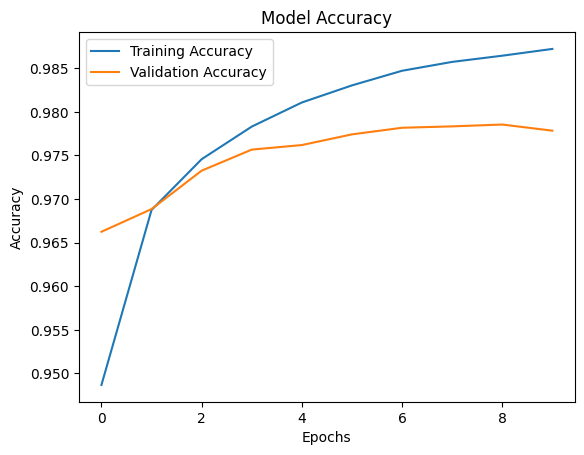

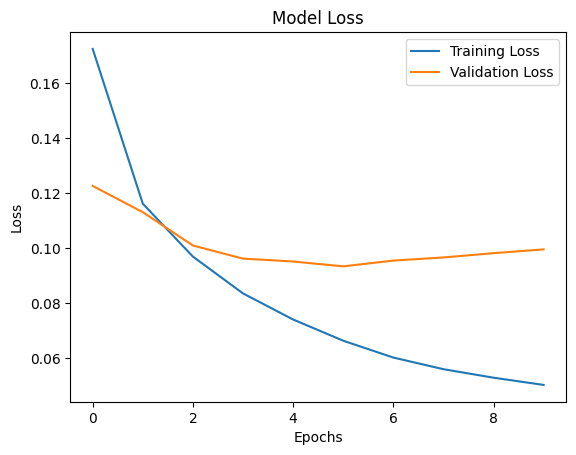

In [24]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Dropout

# Prepare Data for GRU Model

# Tokenize the text data
MAX_NUM_WORDS = 5000  # Maximum number of words to keep in the vocabulary
MAX_SEQUENCE_LENGTH = 100  # Maximum length of each comment (after padding)

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(df['comment_text'])  # Fit the tokenizer on the text
sequences = tokenizer.texts_to_sequences(df['comment_text'])  # Convert texts to sequences of integers

# Pad sequences to ensure equal length for each comment
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Encode the Sentiment Labels (Positive, Neutral, Negative) as integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the GRU Model
model = Sequential()

# Embedding Layer: Converts word indices into dense vectors of fixed size
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))

# GRU Layer: Replacing LSTM with GRU for sequential information capture
model.add(GRU(128, return_sequences=False))

# Dropout Layer: To reduce overfitting
model.add(Dropout(0.5))

# Dense Output Layer with softmax activation for multi-class classification
model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Neutral, Negative

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the GRU Model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on test data
score, accuracy = model.evaluate(X_test, y_test, batch_size=64)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save the trained model
model.save('Models/gru_sentiment_model.h5')

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load the saved model (for future use)
from keras.models import load_model
model = load_model('Models/gru_sentiment_model.h5')